In [ ]:
# 폰트 다운로드 (런타임 재부팅 해야함)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (30.4 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121752 files and direc

In [ ]:
# plot 라이브러리
import matplotlib
import matplotlib.pyplot as plt
# 경고 메시지 무시
import warnings
# 실행결과 경고메시지 출력 제외
warnings.filterwarnings('ignore')
# 글꼴 설정
plt.rc('font', family='NanumBarunGothic')

In [ ]:
!unzip '235743_구내식당 식사 인원 예측 AI 경진대회_data.zip'

Archive:  235743_구내식당 식사 인원 예측 AI 경진대회_data.zip
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings(action='ignore')
%matplotlib inline
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBRegressor
import xgboost

In [ ]:
import os
os.name

# if os.name == 'posix':
#   plt.rc('font', family='AppleGothic')
# elif os.name == 'nt':
#   plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False)

%config InlineBackend.figure_format = 'retina'

In [ ]:
df = pd.read_csv('train.csv')
df.head(5)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              1205 non-null   object 
 1   요일              1205 non-null   object 
 2   본사정원수           1205 non-null   int64  
 3   본사휴가자수          1205 non-null   int64  
 4   본사출장자수          1205 non-null   int64  
 5   본사시간외근무명령서승인건수  1205 non-null   int64  
 6   현본사소속재택근무자수     1205 non-null   float64
 7   조식메뉴            1205 non-null   object 
 8   중식메뉴            1205 non-null   object 
 9   석식메뉴            1205 non-null   object 
 10  중식계             1205 non-null   float64
 11  석식계             1205 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 113.1+ KB


In [ ]:
df.corr()

ValueError: could not convert string to float: '2016-02-01'

In [ ]:
sns.pairplot(df)

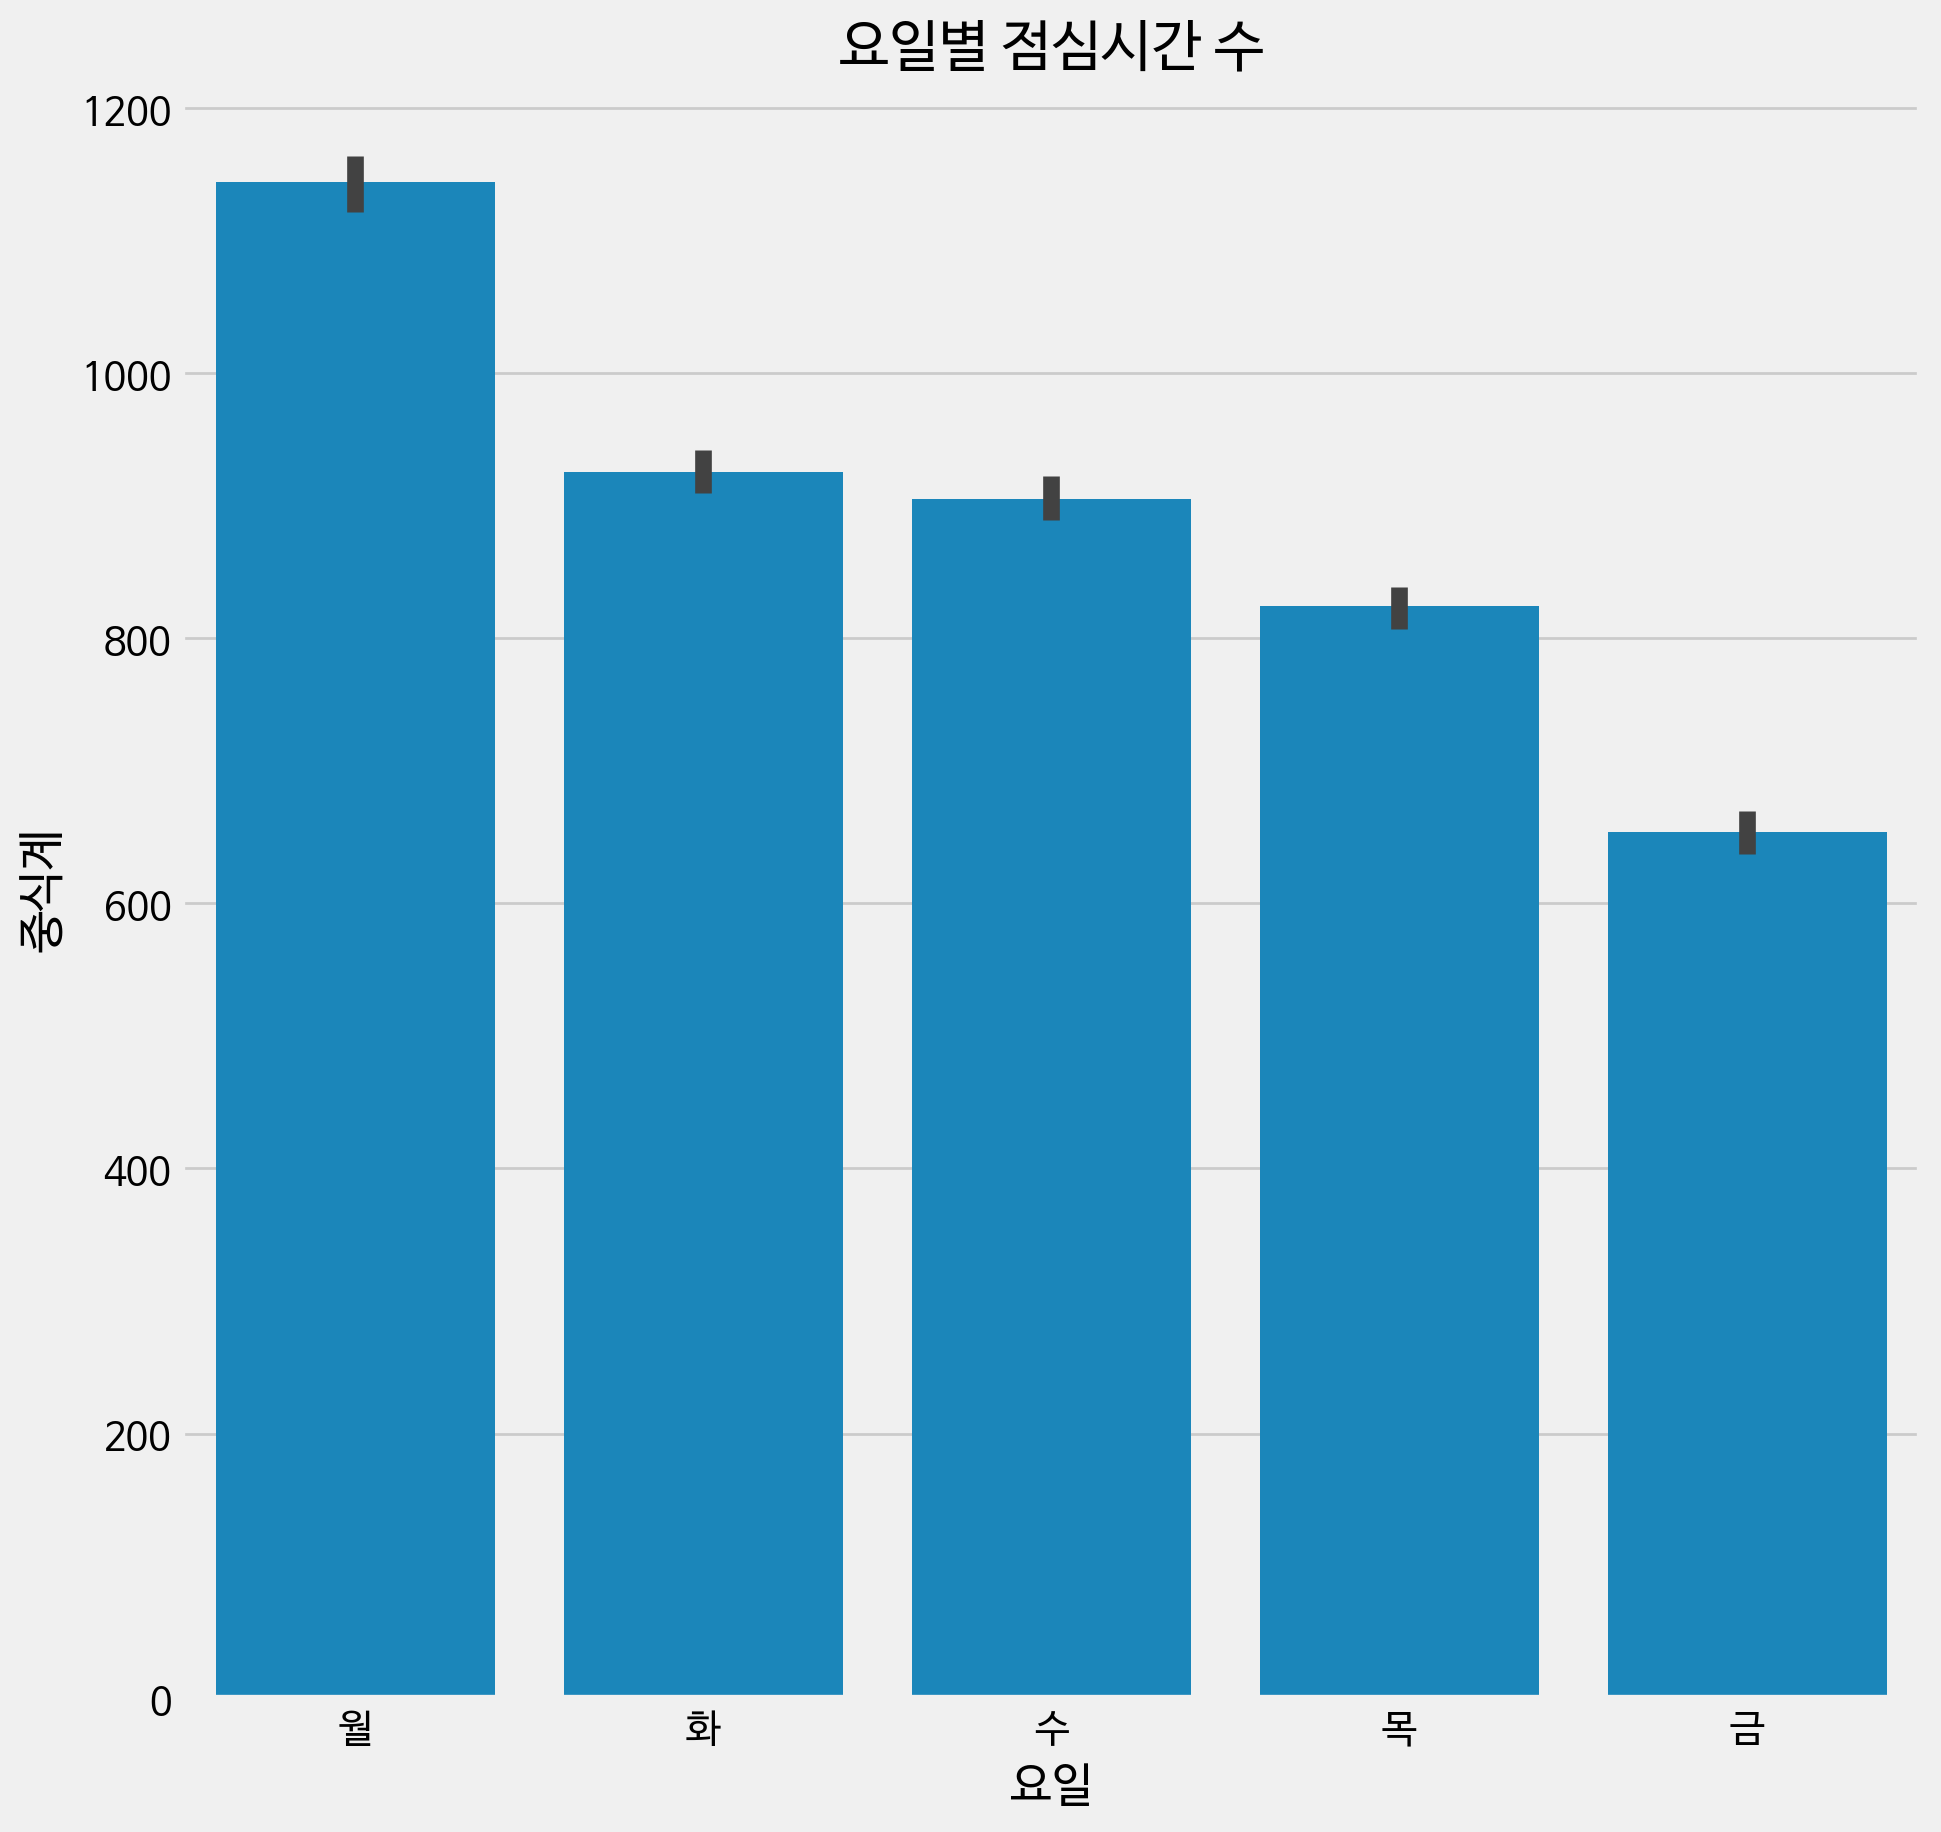

In [ ]:
plt.figure(figsize=(10, 10))

sns.barplot(x='요일', y='중식계', data=df)
plt.title('요일별 점심시간 수')
plt.show()

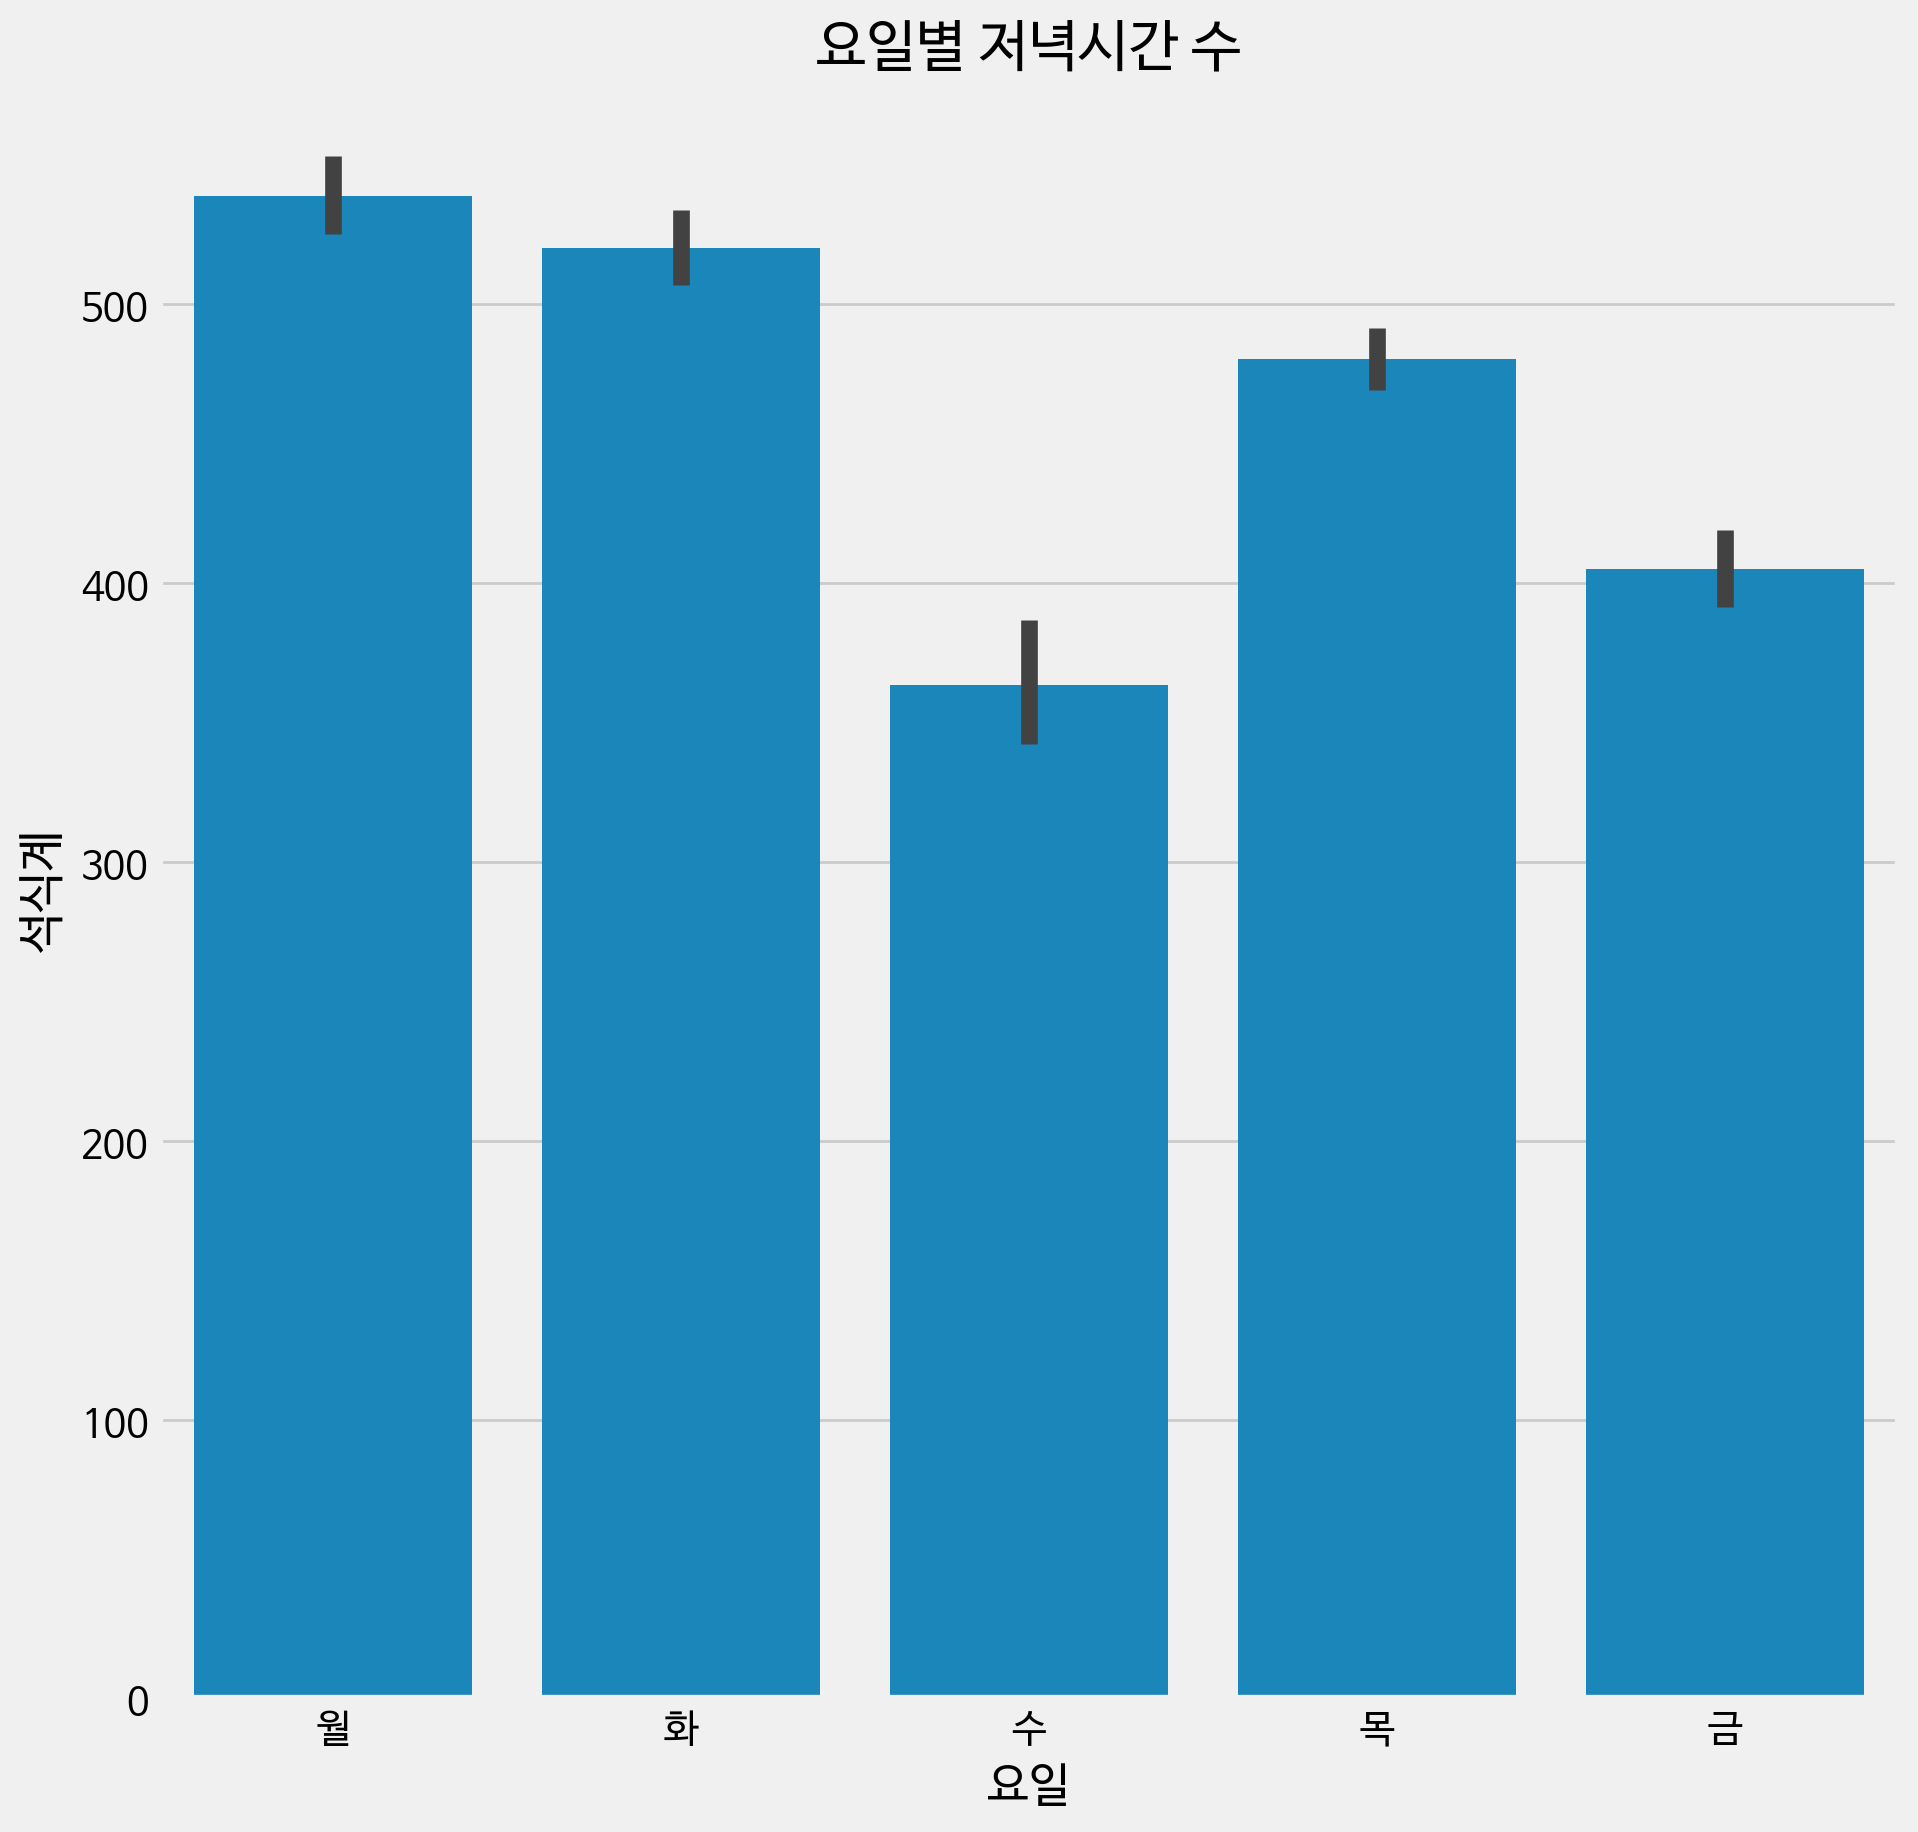

In [ ]:
plt.figure(figsize=(10, 10))

sns.barplot(x='요일', y='석식계', data=df)
plt.title('요일별 저녁시간 수')
plt.show()

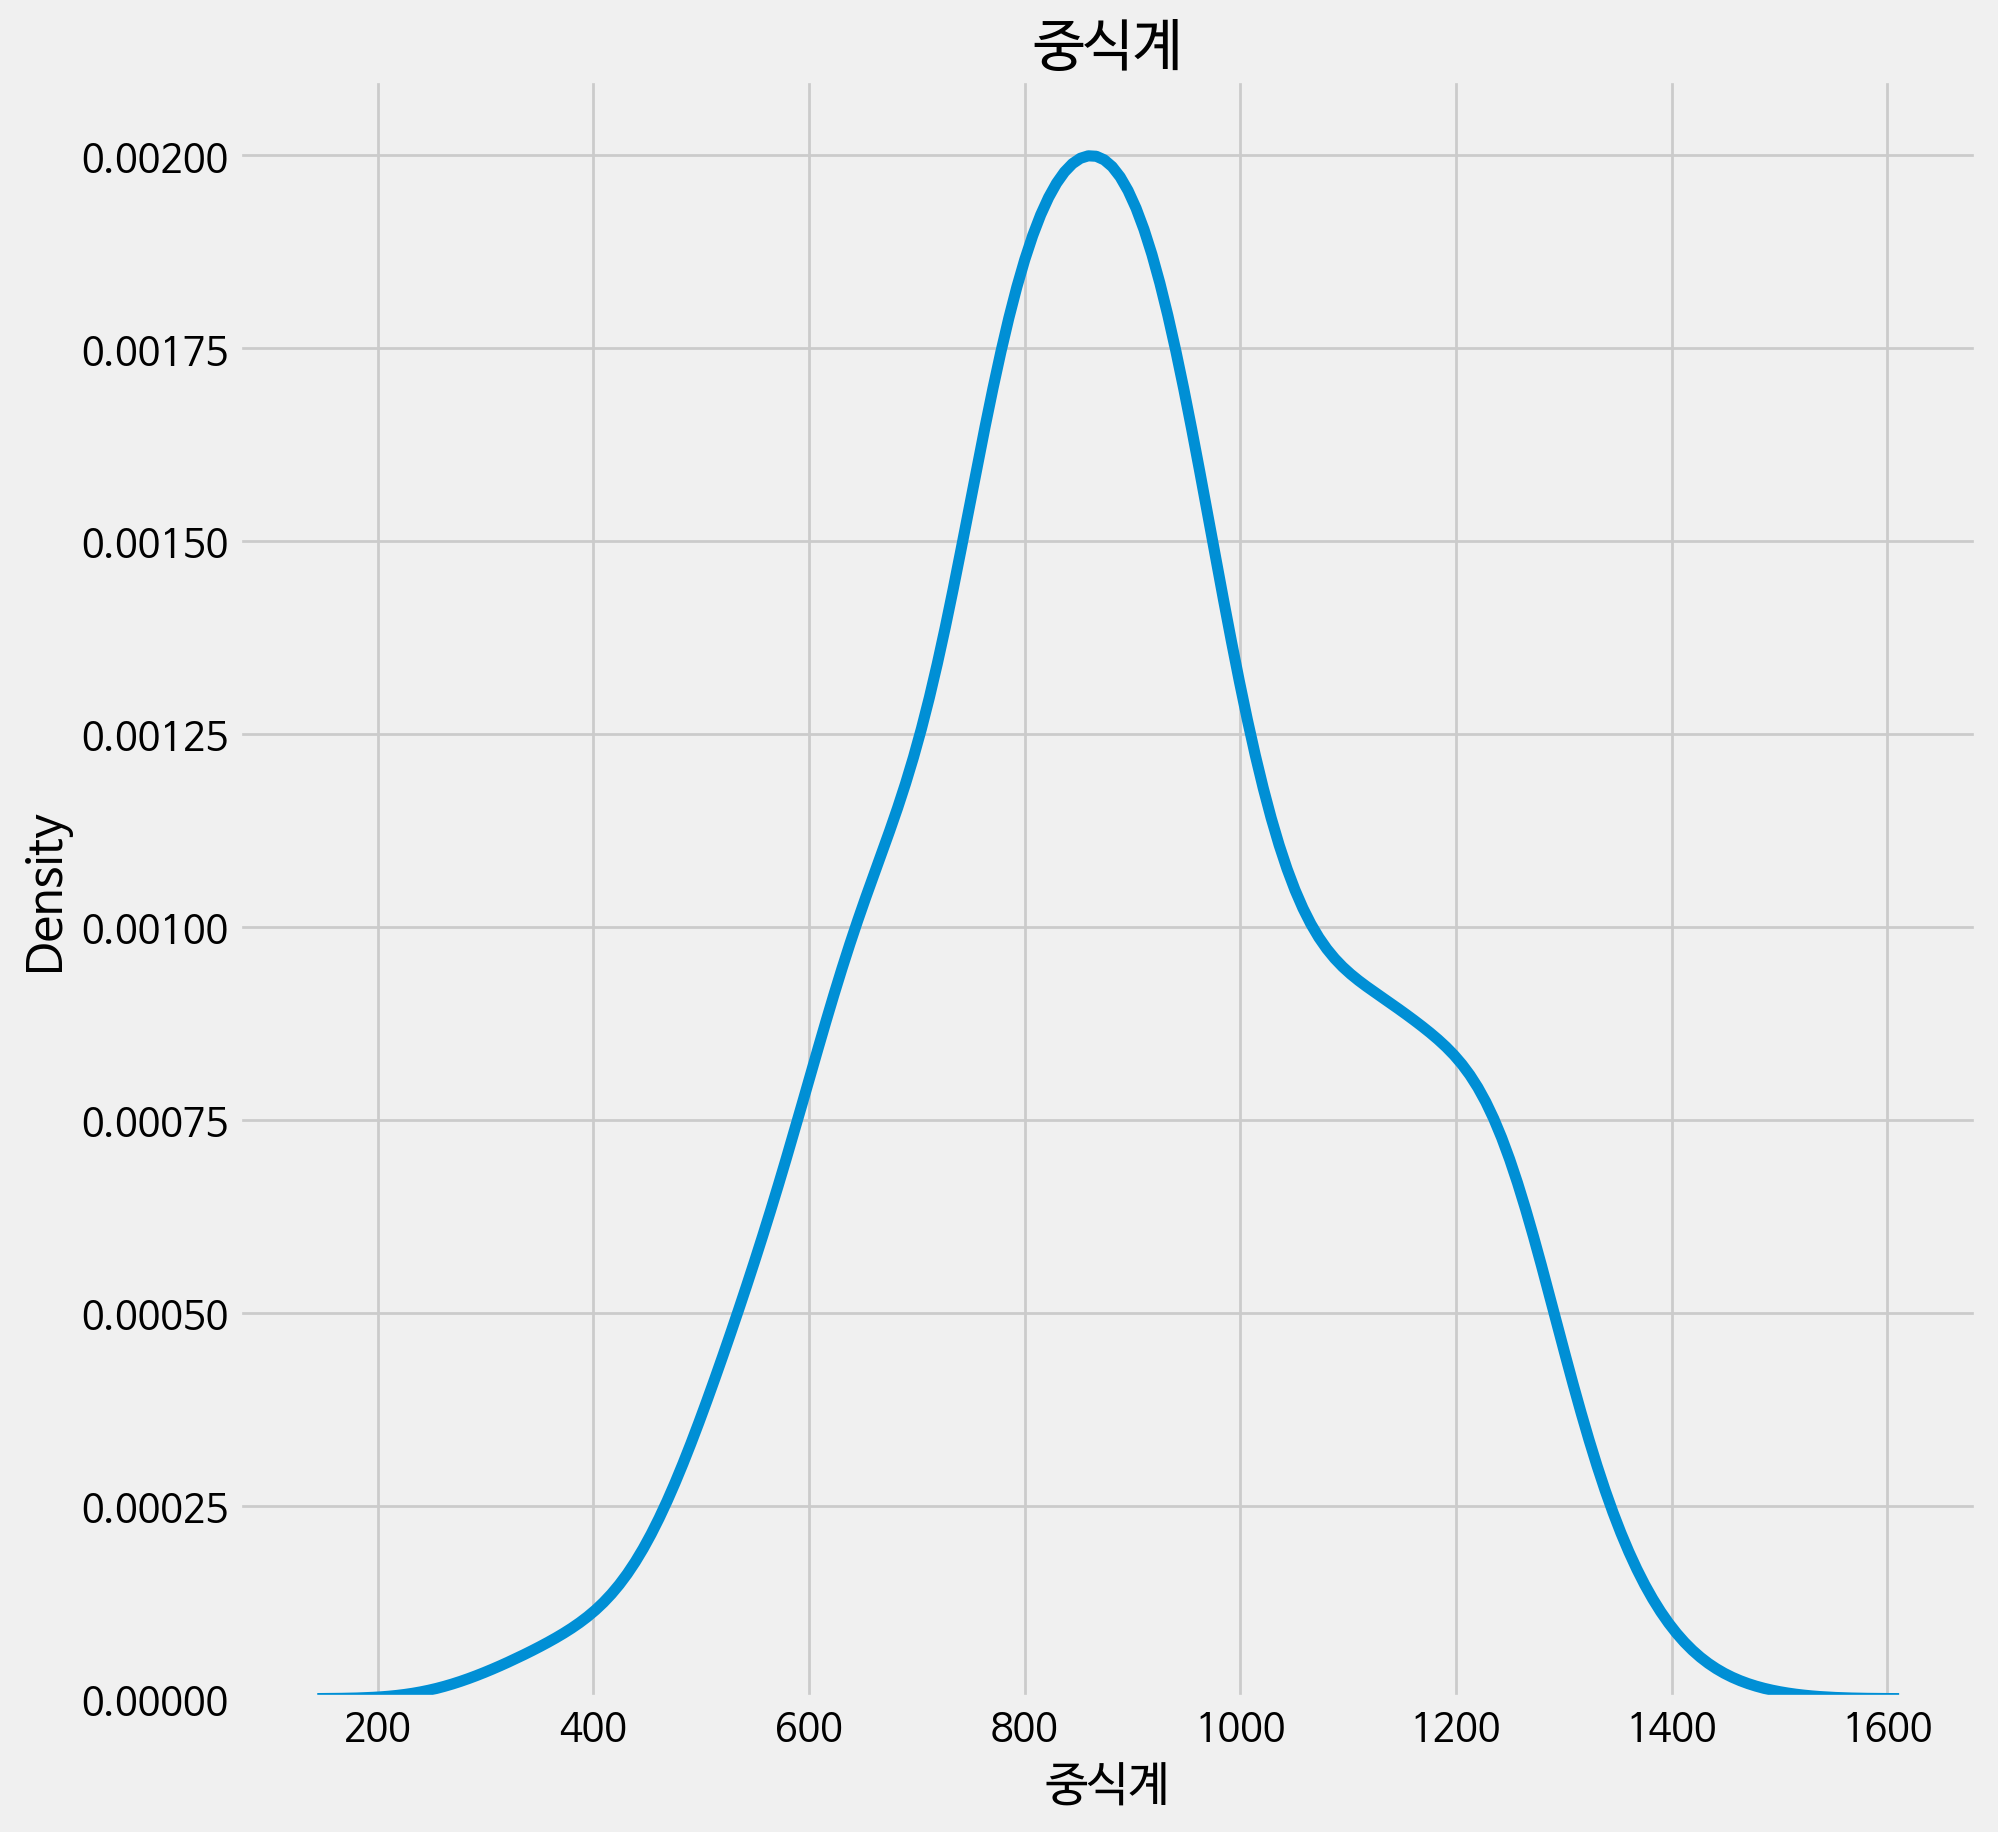

In [ ]:
plt.figure(figsize=(10, 10))
x = df['중식계']
sns.kdeplot(x)
plt.title('중식계')
plt.show()

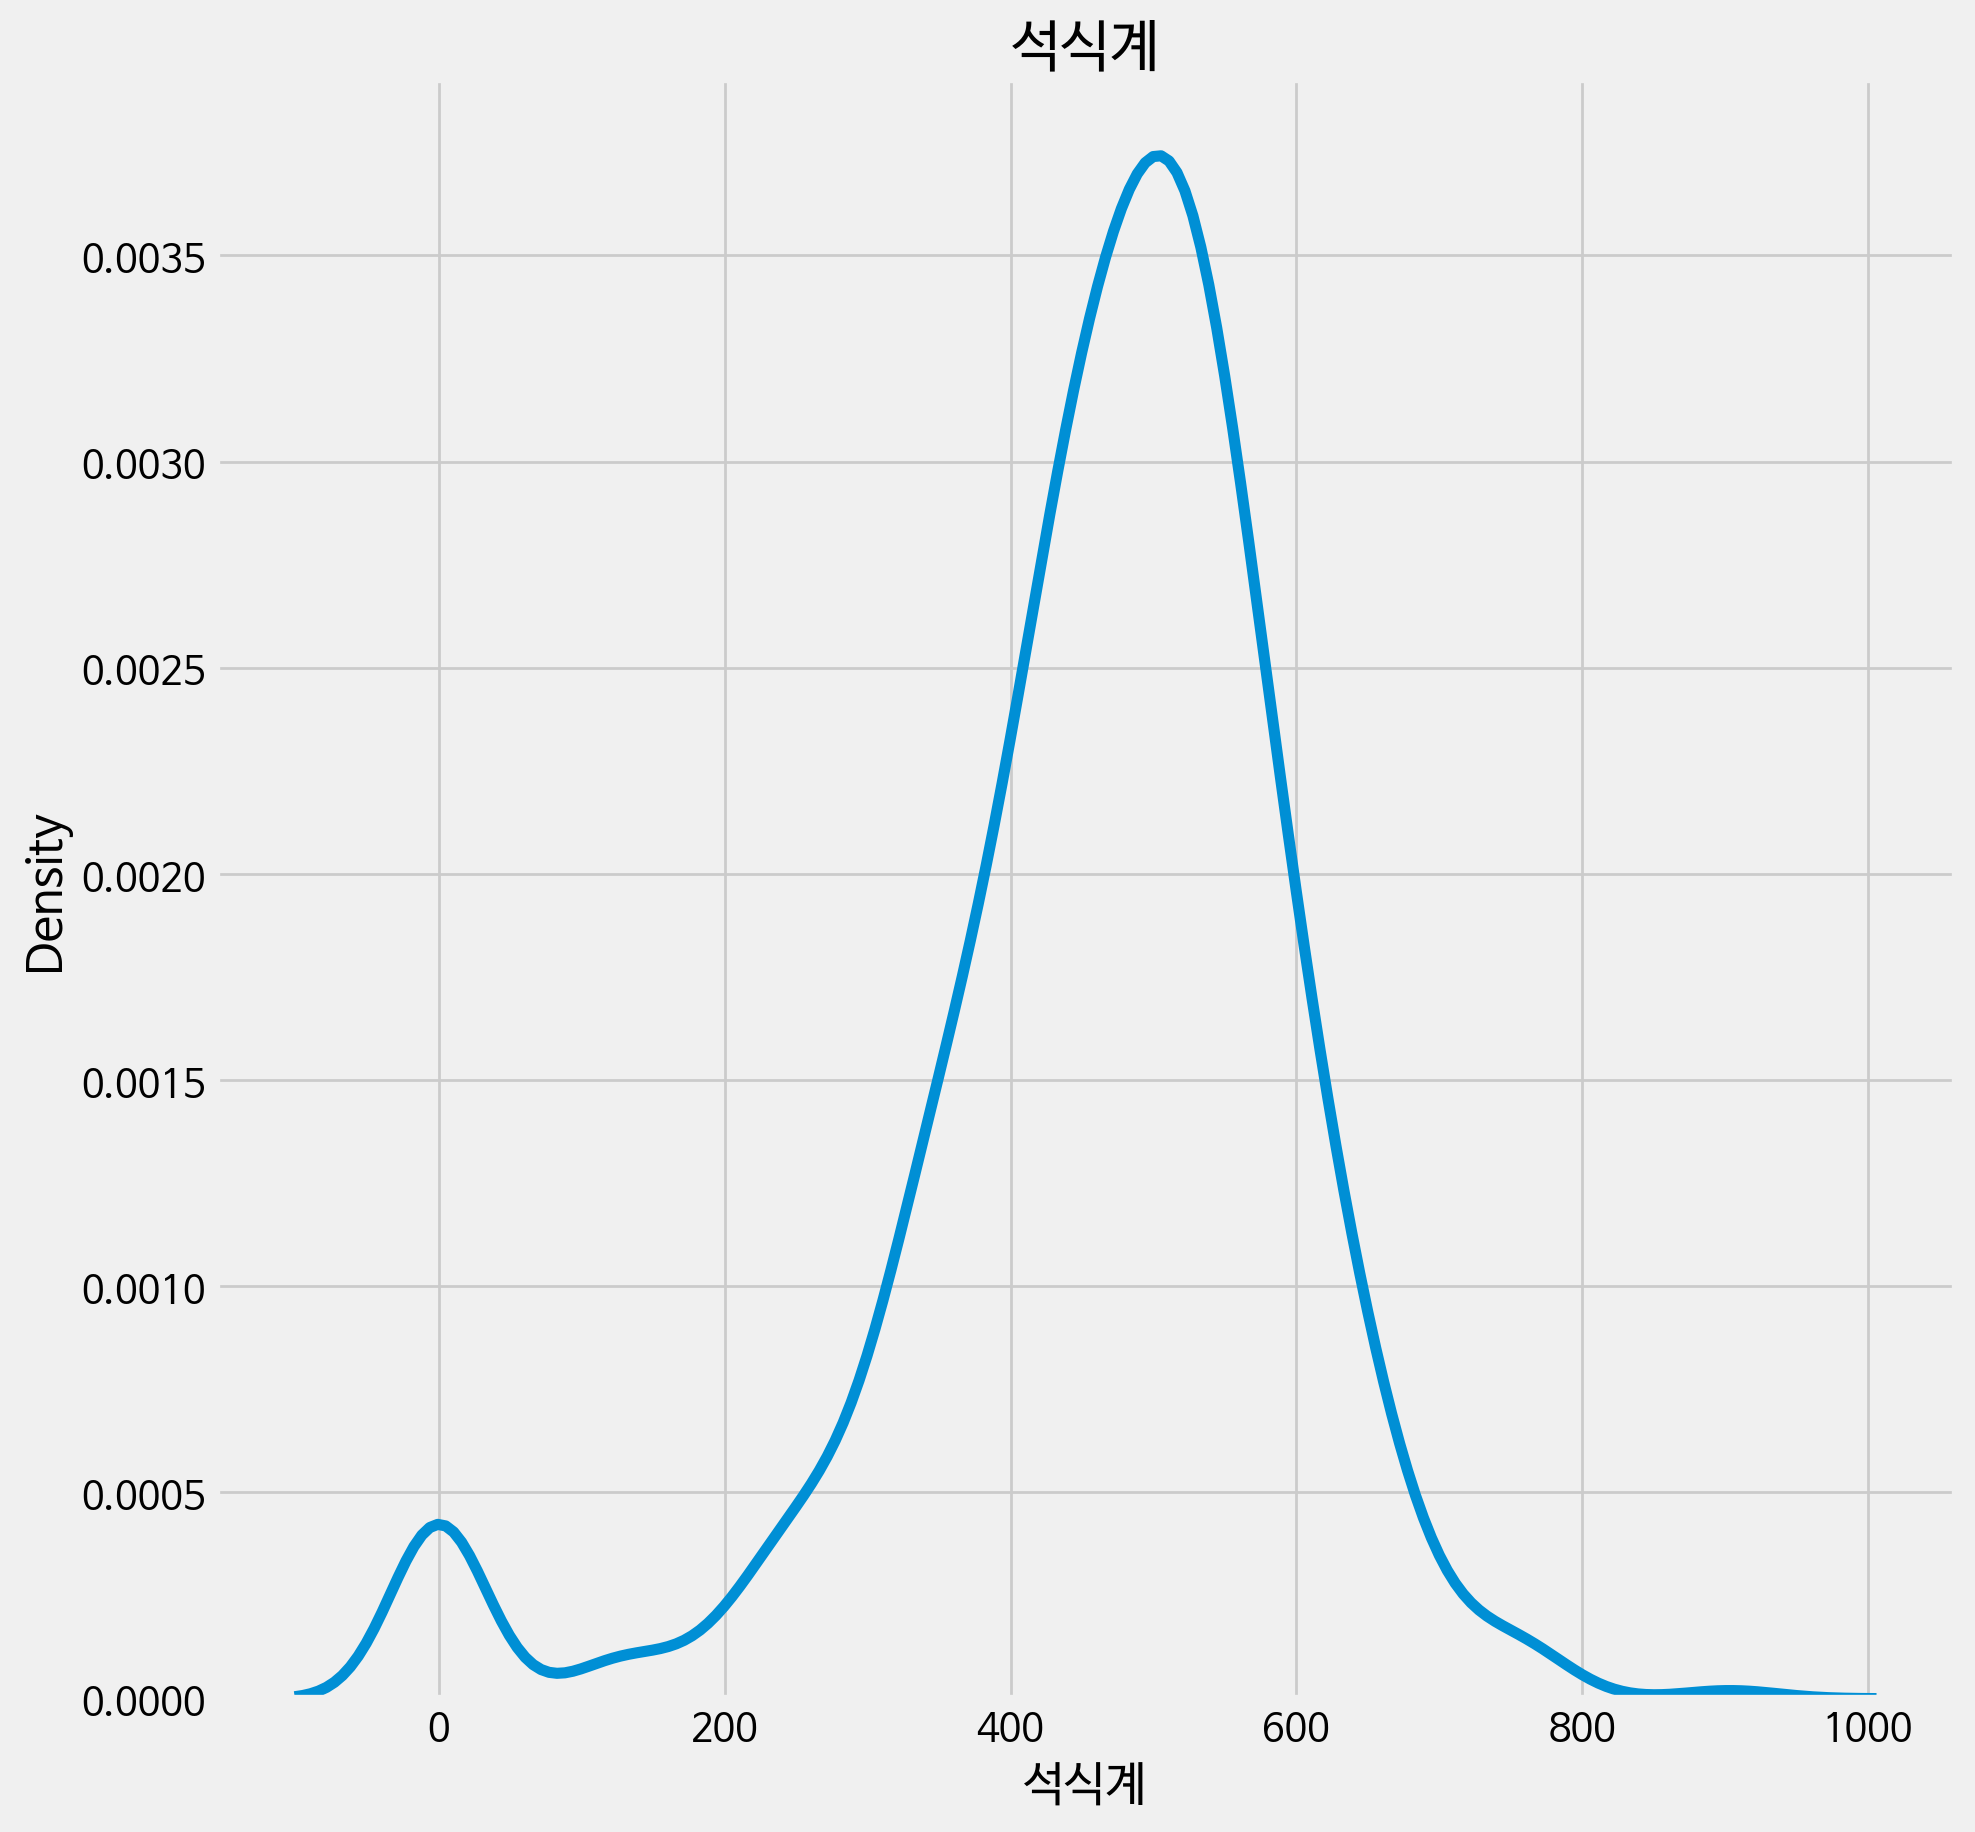

In [ ]:
plt.figure(figsize=(10, 10))
x = df['석식계']
sns.kdeplot(x)
plt.title('석식계')
plt.show()

In [ ]:
print(df['본사정원수'].max())
print('\n')
print(df['중식계'].describe())
print('\n')
print(df['석식계'].describe())

3305


count    1205.000000
mean      890.334440
std       209.505057
min       296.000000
25%       758.000000
50%       879.000000
75%      1032.000000
max      1459.000000
Name: 중식계, dtype: float64


count    1205.000000
mean      461.772614
std       139.179202
min         0.000000
25%       406.000000
50%       483.000000
75%       545.000000
max       905.000000
Name: 석식계, dtype: float64


In [ ]:
df.columns = ['date', 'day', 'numbers', 'dayoff', 'work', 'outsidework', 'workfhome', 'break', 'lunch', 'dinner', 'lunch_t', 'dinner_t']
df.head(2)

,date,day,numbers,dayoff,work,outsidework,workfhome,break,lunch,dinner,lunch_t,dinner_t
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0


In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['yearmonth'] = df['date'].dt.strftime('%Y%m')

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].dt.strftime('%m%d')

In [ ]:
df['Month'] = df['date'].str[0:2]
df['Date'] = df['date'].str[2:]
df.drop(['date', 'break'], inplace=True, axis=1)

df.head(2)

,day,numbers,dayoff,work,outsidework,workfhome,lunch,dinner,lunch_t,dinner_t,yearmonth,Month,Date
0,월,2601,50,150,238,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,201602,02,01
1,화,2601,50,173,319,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,201602,02,02


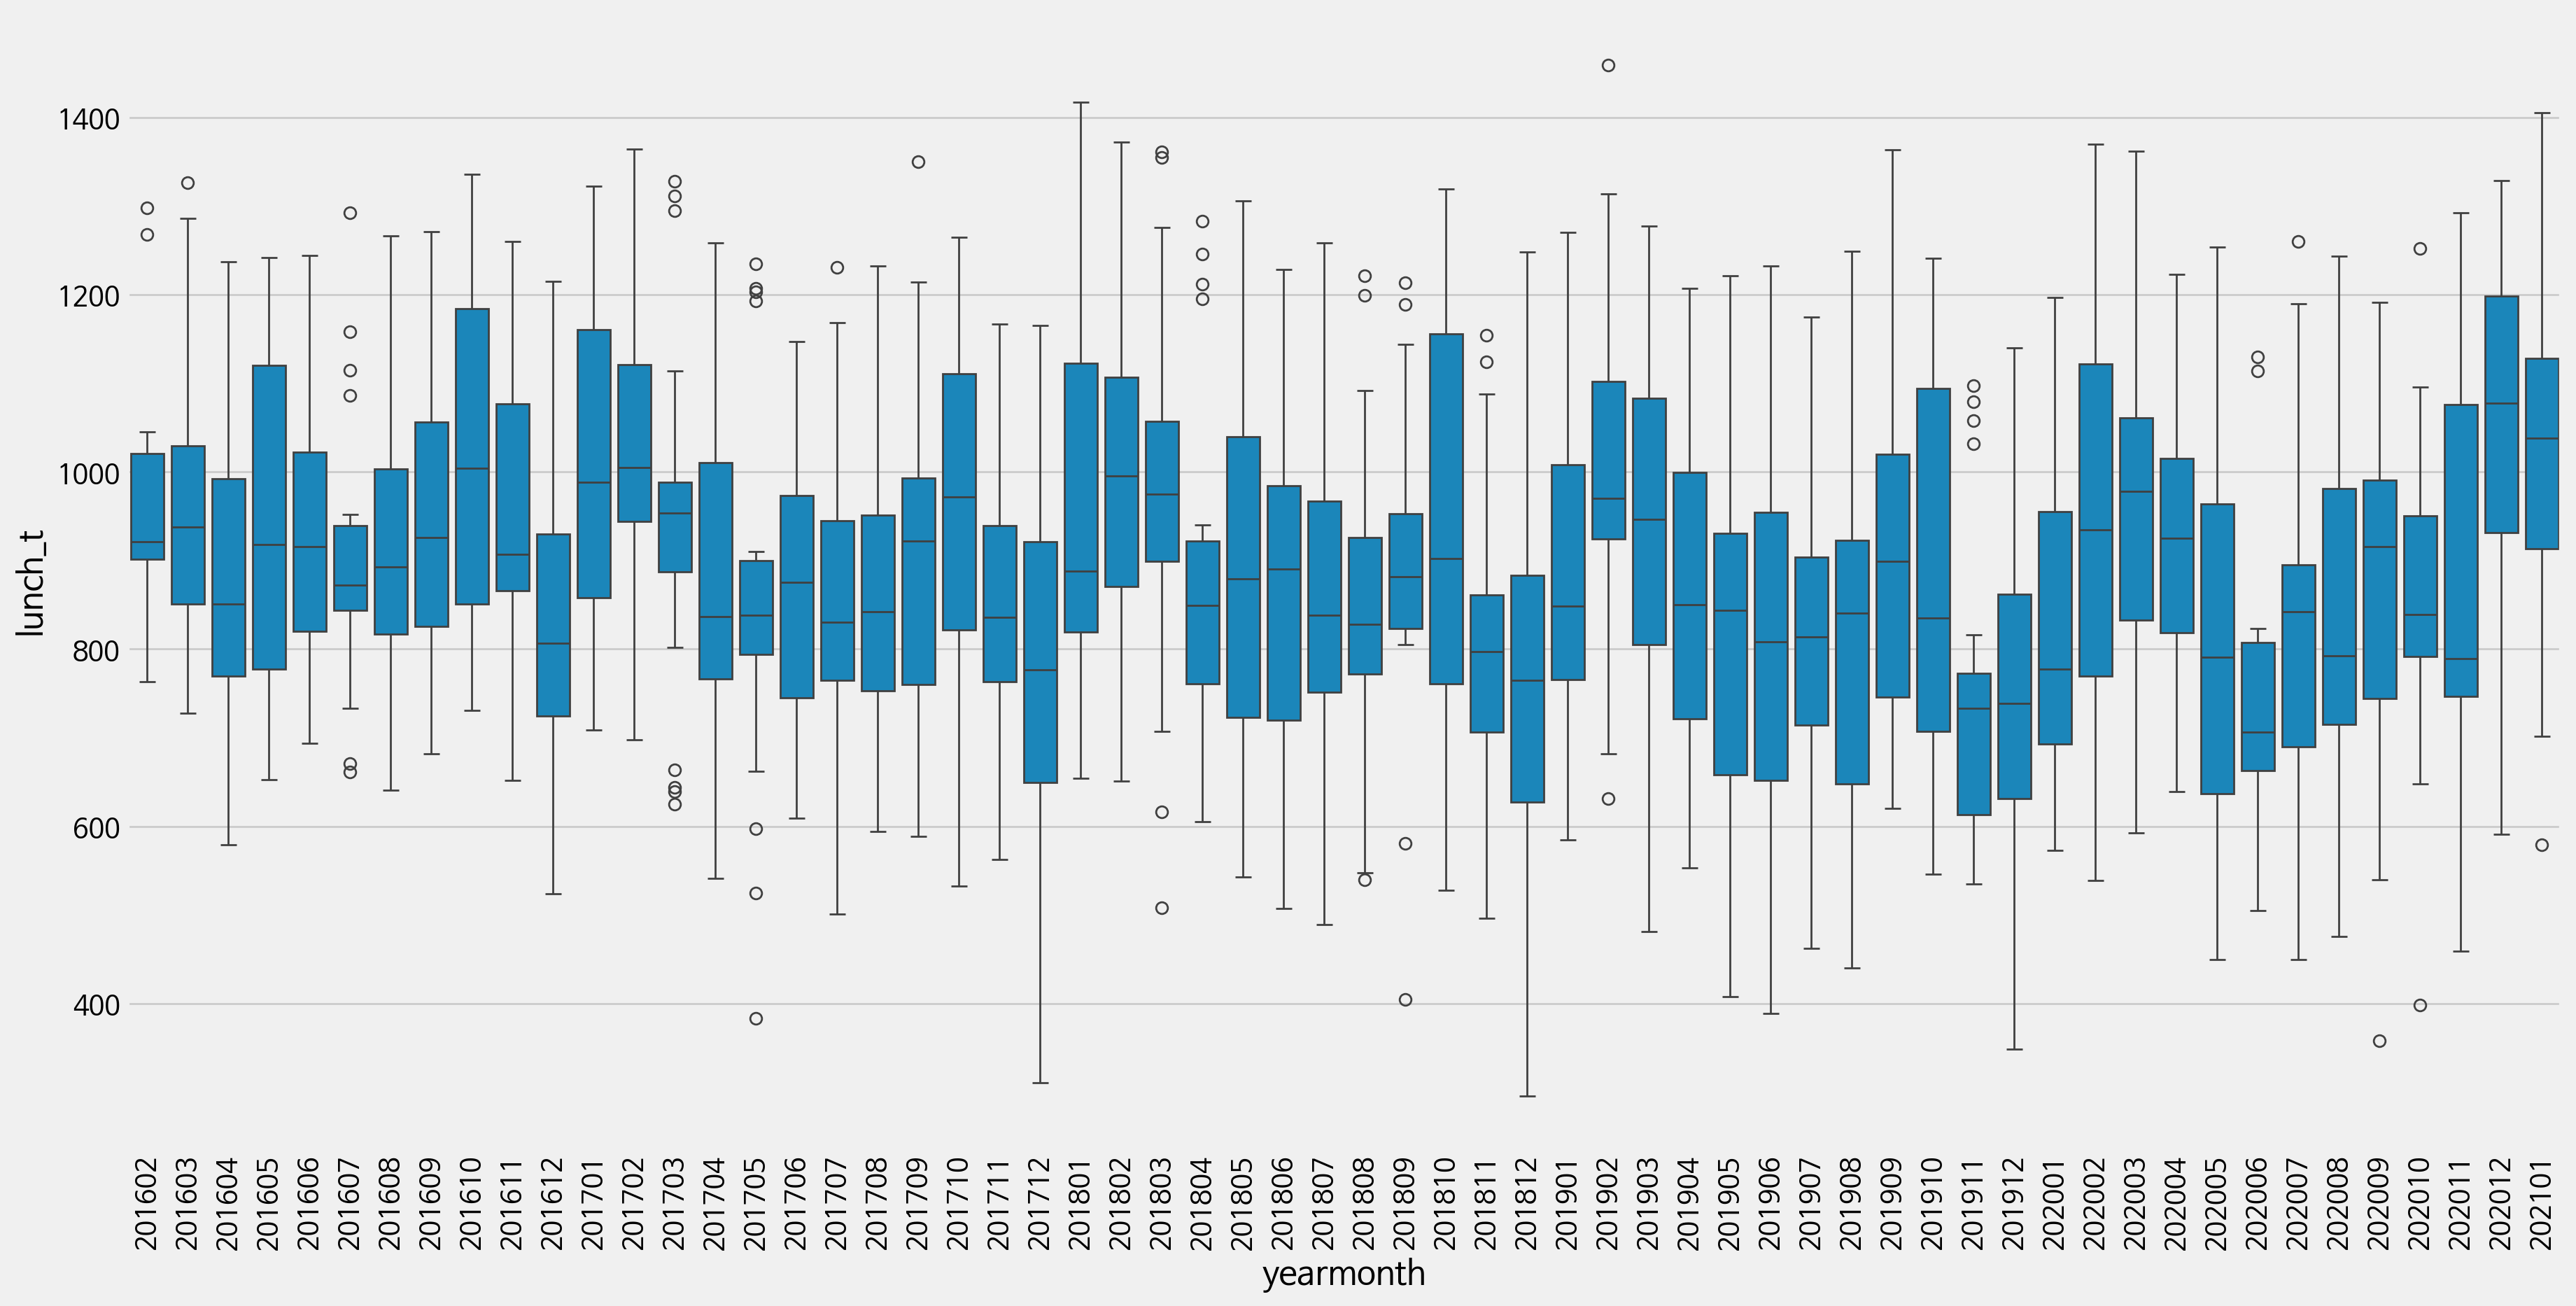

In [ ]:
plt.figure(figsize=(20, 10))
rot = sns.boxplot(x='yearmonth', y='lunch_t', data=df)

for item in rot.get_xticklabels():
  item.set_rotation(90)

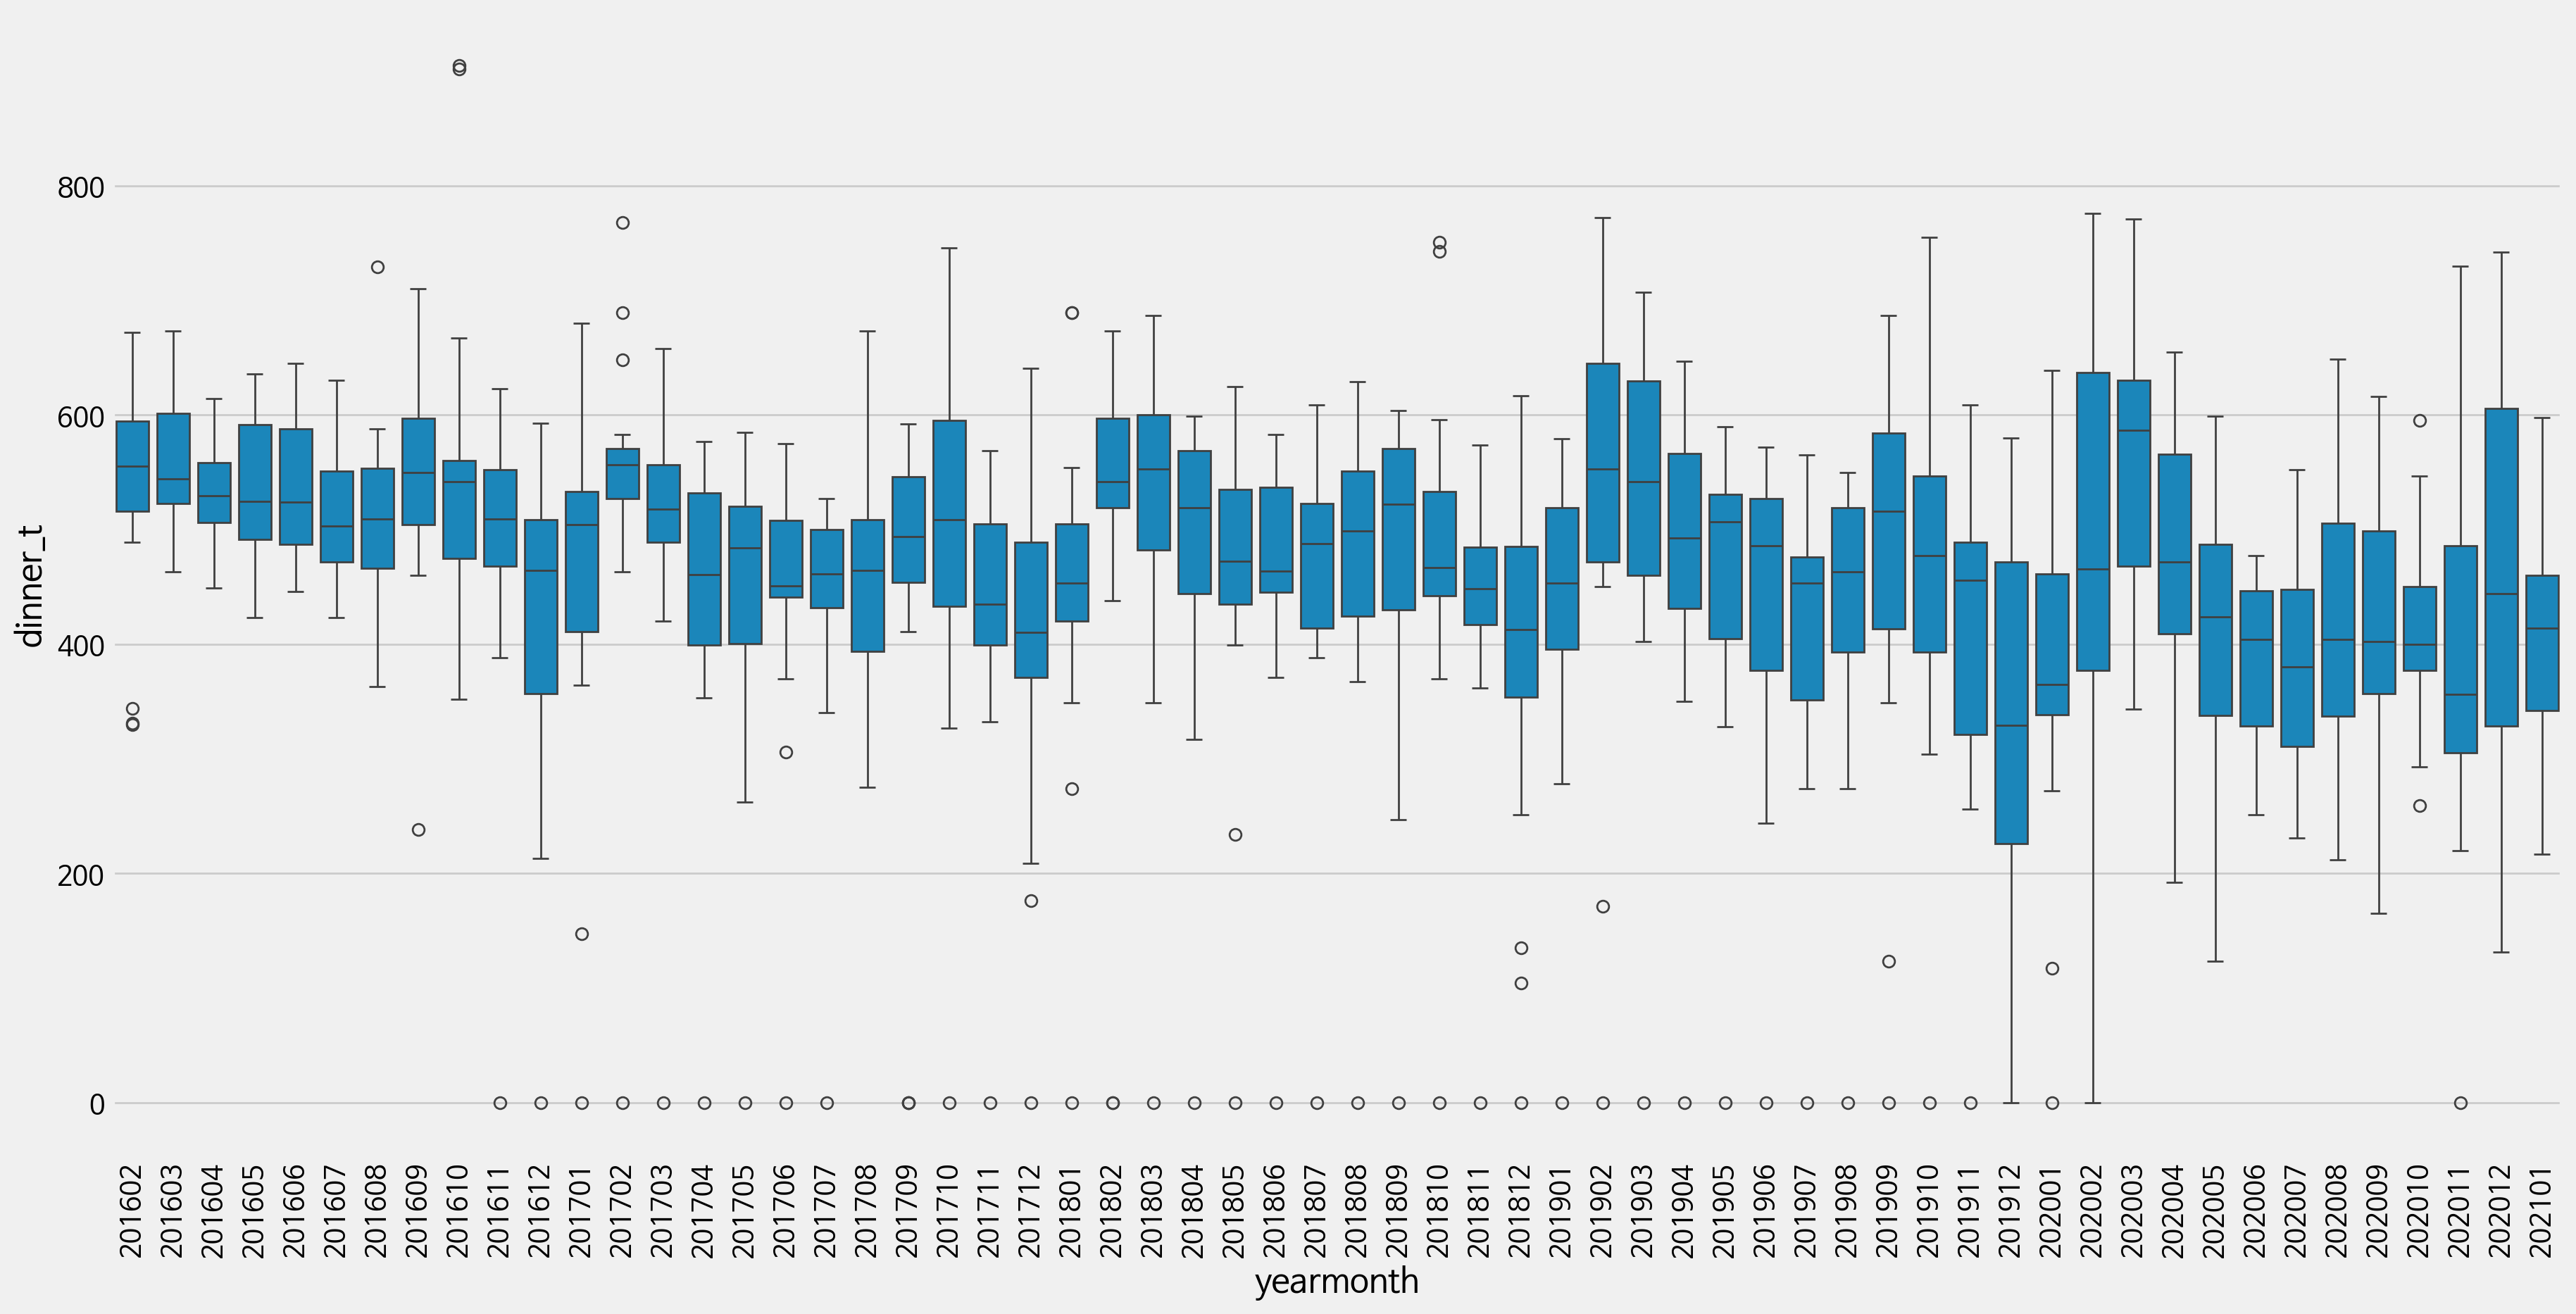

In [ ]:
plt.figure(figsize=(20, 10))
rot = sns.boxplot(x='yearmonth', y='dinner_t', data=df)

for item in rot.get_xticklabels():
  item.set_rotation(90)

In [ ]:
df.drop('yearmonth', inplace=True, axis=1)

In [ ]:
lunch_menu = []

for day in range(len(df)):
  tmp = df.loc[day, 'lunch'].split(' ')
  tmp = ' '.join(tmp).split()
  # print(tmp)
  for menu in tmp:
    #print(menu)
    if '(' in menu:
      tmp.remove(menu)
  lunch_menu.append(tmp)

In [ ]:
# print(lunch_menu[:3])
for bob in range(len(df)):
  if '쌀밥' in lunch_menu[bob][0]:
    lunch_menu[bob][0] = '밥'

In [ ]:
lunch_menu[:3]

[['밥', '오징어찌개', '쇠불고기', '계란찜', '청포묵무침', '요구르트', '포기김치'],
 ['밥', '김치찌개', '가자미튀김', '모둠소세지구이', '마늘쫑무침', '요구르트', '배추겉절이'],
 ['카레덮밥', '팽이장국', '치킨핑거', '쫄면야채무침', '견과류조림', '요구르트', '포기김치']]

In [ ]:
df['lunch_menu'] = lunch_menu
df.head(2)

,day,numbers,dayoff,work,outsidework,workfhome,lunch,dinner,lunch_t,dinner_t,Month,Date,lunch_menu
0,월,2601,50,150,238,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,02,01,"[밥, 오징어찌개, 쇠불고기, 계란찜, 청포묵무침, 요구르트, 포기김치]"
1,화,2601,50,173,319,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,02,02,"[밥, 김치찌개, 가자미튀김, 모둠소세지구이, 마늘쫑무침, 요구르트, 배추겉절이]"


In [ ]:
bob = []
soup = []
main = []

for i in range(len(df)):
  if lunch_menu[i][0]:
    bob.append(lunch_menu[i][0])
  if lunch_menu[i][1]:
    soup.append(lunch_menu[i][1])
  if lunch_menu[i][2]:
    main.append(lunch_menu[i][2])

In [ ]:
print(len(bob))
print(len(soup))
print(len(main))
print('--')
print(len(df))

1205
1205
1205
--
1205


In [ ]:
df['bob'] = bob
df['soup'] = soup
df['main'] = main

In [ ]:
df.head(2)

,day,numbers,dayoff,work,outsidework,workfhome,lunch,dinner,lunch_t,dinner_t,Month,Date,lunch_menu,bob,soup,main
0,월,2601,50,150,238,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,02,01,"[밥, 오징어찌개, 쇠불고기, 계란찜, 청포묵무침, 요구르트, 포기김치]",밥,오징어찌개,쇠불고기
1,화,2601,50,173,319,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,02,02,"[밥, 김치찌개, 가자미튀김, 모둠소세지구이, 마늘쫑무침, 요구르트, 배추겉절이]",밥,김치찌개,가자미튀김


In [ ]:
df['bob'].value_counts()

bob
밥              1003
콩나물밥             23
카레덮밥             18
나물비빔밥            15
곤드레밥*강된장         12
단호박영양밥           10
곤드레밥*양념장          8
김치제육덮밥            8
곤드레밥              8
비빔밥               8
카레라이스             8
짜장덮밥              6
낙지비빔밥             6
콩나물밥*양념장          5
산채비빔밥             5
마파두부덮밥            5
열무보리비빔밥           4
짜장밥               4
열무비빔밥             3
봄나물비빔밥            3
소불고기덮밥            3
단호박카레라이스          2
<초복특식>            2
곤드레밥*간장양념         2
콩나물밥*달래장          2
참치회덮밥             2
오곡밥               1
건강비빔밥*약고추장        1
새우날치알볶음밥          1
소고기콩나물밥*양념        1
닭살카레라이스           1
열무보리비빔밥/강된장       1
베이컨김치볶음밥          1
돈육버섯고추장덮밥         1
김밥볶음밥             1
비빔밥*약고추장          1
낙지비빔밥*계란후라이       1
계란채소볶음밥           1
전주비빔밥             1
호박된장국             1
고기듬뿍카레라이스         1
불고기비빔밥            1
버섯영양밥             1
김치필라프             1
파인애플볶음밥           1
김치볶음밥/계란          1
오므라이스             1
김치볶음밥             1
야채볶음밥*짜장소스        1
봄새싹비빔밥          

In [ ]:
df['soup'].value_counts()

soup
맑은국          46
콩나물국         44
된장찌개         37
어묵국          31
배추된장국        28
             ..
올챙이만두국        1
들깨시락국         1
맑은순두부국        1
꽃게된장찌개        1
전주식콩나물해장국     1
Name: count, Length: 272, dtype: int64

In [ ]:
df['main'].value_counts()

main
오징어볶음        32
닭갈비          30
버섯불고기        29
훈제오리구이       27
돈육굴소스볶음      25
             ..
새우까스*탈탈소스     1
쇠고기모듬장조림      1
새우까스*칠리소스     1
메추리알조림        1
교촌간장치킨        1
Name: count, Length: 391, dtype: int64

In [ ]:
df['soup'].value_counts()[:10]

soup
맑은국      46
콩나물국     44
된장찌개     37
어묵국      31
배추된장국    28
아욱국      28
가쯔오장국    28
근대국      26
꽃게탕      25
순두부찌개    23
Name: count, dtype: int64

In [ ]:
df['main'].value_counts()[:10]

main
오징어볶음      32
닭갈비        30
버섯불고기      29
훈제오리구이     27
돈육굴소스볶음    25
짬뽕불고기      24
제육볶음       23
등갈비김치찜     21
언양식불고기     20
주꾸미볶음      19
Name: count, dtype: int64

In [ ]:
dinner_menu = []
for day in range(len(df)):
  tmp = df.loc[day, 'dinner'].split()
  tmp = ' '.join(tmp).split()
  for menu in tmp:
    if '(' in menu:
      tmp.remove(menu)
  dinner_menu.append(tmp)

In [ ]:
df['dinner_menu'] = dinner_menu

In [ ]:
len(df['dinner_menu'])

1205

In [ ]:
dinner_menu[0:5]

[['쌀밥/잡곡밥', '육개장', '자반고등어구이', '두부조림', '건파래무침', '포기김치'],
 ['콩나물밥*양념장', '어묵국', '유산슬', '아삭고추무침', '바나나', '포기김치'],
 ['쌀밥/잡곡밥', '청국장찌개', '황태양념구이', '고기전', '새송이버섯볶음', '포기김치'],
 ['미니김밥*겨자장', '우동', '멕시칸샐러드', '군고구마', '무피클', '포기김치'],
 ['쌀밥/잡곡밥', '차돌박이찌개', '닭갈비', '감자소세지볶음', '콩나물무침', '포기김치']]

In [ ]:
print(range(len(df)))
print(range(len(dinner_menu)))

range(0, 1205)
range(0, 1205)


In [ ]:
bobd = []
soupd = []
maind = []

for word in dinner_menu:
  if len(word) == 0:
    bobd.append('None')
    soupd.append('None')
    maind.append('None')
  elif '*' in word:
    bobd.append('None')
    soupd.append('None')
    maind.append('None')
  elif '가정의날' in word:
    bobd.append('None')
    soupd.append('None')
    maind.append('None')
  elif '자기계발의날' in word:
    bobd.append('None')
    soupd.append('None')
    maind.append('None')
  elif '*자기계발의날*' in word:
    bobd.append('None')
    soupd.append('None')
    maind.append('None')
  elif '자기개발의날' in word:
    bobd.append('None')
    soupd.append('None')
    maind.append('None')
  else:
    print(word)
    bobd.append(word[0])
    soupd.append(word[1])
    maind.append(word[2])

['쌀밥/잡곡밥', '육개장', '자반고등어구이', '두부조림', '건파래무침', '포기김치']
['콩나물밥*양념장', '어묵국', '유산슬', '아삭고추무침', '바나나', '포기김치']
['쌀밥/잡곡밥', '청국장찌개', '황태양념구이', '고기전', '새송이버섯볶음', '포기김치']
['미니김밥*겨자장', '우동', '멕시칸샐러드', '군고구마', '무피클', '포기김치']
['쌀밥/잡곡밥', '차돌박이찌개', '닭갈비', '감자소세지볶음', '콩나물무침', '포기김치']
['참치회덮밥', '맑은국', '군만두', '과일샐러드', '락교', '포기김치']
['쌀밥/잡곡밥', '김치콩나물국', '미니함박', '어묵볶음', '물파래무침', '깍두기']
['쌀밥/잡곡밥', '홍합미역국', '등갈비김치찜', '임연수구이', '브로컬리초장', '포기김치']
['쌀밥/잡곡밥', '된장찌개', '쇠불고기', '해파리겨자채', '봄동무침', '포기김치']
['볶음밥*자장소스', '맑은국', '새우또띠아', '쨔샤이무침', '요플레', '포기김치']
['쌀밥/잡곡밥', '순두부찌개', '명태조림', '감자채볶음', '쌈만두', '포기김치']
['쌀밥/잡곡밥', '설렁탕', '김치전', '야채스틱', '바나나', '석박지']
['쌀밥/잡곡밥', '옹심이만두국', '떡갈비조림', '청포묵무침', '부추오이생채', '포기김치']
['쌀밥/잡곡밥', '콩비지찌개', '해물까스&타르타르소스', '볶음쌀국수', '미역레몬초무침', '통배추겉절이']
['쌀밥/잡곡밥', '열무된장국', '매운돼지갈비찜', '멸치호두볶음', '숙주나물', '포기김치']
['김밥', '잔치국수', '교자만두', '찜)', '멕시칸샐러드', '무피클', '포기김치']
['쌀밥/잡곡밥', '닭개장', '삼치구이', '꽃맛살볶음', '청경채사과무침', '포기김치']
['쌀밥/잡곡밥', '버섯들깨탕', '꽁치한마리구이', '두부양념조림', '구이김', '포기김치']
['쌀밥/잡곡밥', '된장찌개', '버섯불고기

In [ ]:
print(len(dinner_menu))
print(len(bobd))
print(len(soupd))
print(len(maind))

1205
1205
1205
1205


In [ ]:
df['bobd'] = bobd
df['soupd'] = soupd
df['maind'] = maind

In [ ]:
df['maind'].value_counts()[:10]

maind
None       41
닭갈비        16
떡볶이        16
돈육강정       15
돈육굴소스볶음    14
고추잡채*꽃빵    14
유린기        14
깐풍기        14
돈육장조림      14
주꾸미볶음      13
Name: count, dtype: int64

In [ ]:
df['soupd'].value_counts()[:10]

soupd
None     41
잔치국수     37
맑은국      33
된장찌개     30
육개장      29
가쯔오장국    29
미소장국     28
부대찌개     25
우동       23
닭개장      23
Name: count, dtype: int64

In [ ]:
train = df[['day', 'numbers', 'dayoff', 'work', 'outsidework', 'workfhome', 'lunch_t', 'Month', 'Date', 'bob', 'soup', 'main']]

In [ ]:
train['day'] = train['day'].astype('category')
train['day'] = train.day.cat.codes

train['bob'] = train['bob'].astype('category')
train['bob'] = train.bob.cat.codes

train['soup'] = train['soup'].astype('category')
train['soup'] = train.soup.cat.codes

train['main'] = train['main'].astype('category')
train['main'] = train.main.cat.codes

In [ ]:
train['present'] = train['numbers']-train['dayoff']-train['work']-train['outsidework']

In [ ]:
train.head()

,day,numbers,dayoff,work,outsidework,workfhome,lunch_t,Month,Date,bob,soup,main,present
0,3,2601,50,150,238,0.0,1039.0,02,01,22,189,236,2163
1,4,2601,50,173,319,0.0,867.0,02,02,22,28,8,2059
2,2,2601,56,180,111,0.0,1017.0,02,03,49,249,334,2254
3,1,2601,104,220,355,0.0,978.0,02,04,22,149,309,1922
4,0,2601,278,181,34,0.0,925.0,02,05,22,75,106,2108


In [ ]:
train.corr()

,day,numbers,dayoff,work,outsidework,workfhome,lunch_t,Month,Date,bob,soup,main,present
day,1.000000,0.004999,-0.210219,-0.447183,0.539062,0.028364,0.584193,-0.004325,0.005616,-0.051779,0.039582,0.033023,-0.327922
numbers,0.004999,1.000000,0.244666,-0.061688,0.146544,0.452293,-0.115529,0.244705,-0.020737,0.008470,-0.047180,0.063892,0.409730
dayoff,-0.210219,0.244666,1.000000,-0.273318,-0.230789,0.065397,-0.391975,0.193627,-0.009210,0.008260,-0.033509,0.022062,-0.134040
work,-0.447183,-0.061688,-0.273318,1.000000,-0.308757,-0.352643,-0.512680,0.210877,0.144007,0.062909,-0.016055,-0.038943,0.244995
outsidework,0.539062,0.146544,-0.230789,-0.308757,1.000000,0.156792,0.535611,0.018316,-0.093606,-0.182796,0.078805,0.017750,-0.696646
workfhome,0.028364,0.452293,0.065397,-0.352643,0.156792,1.000000,0.076509,0.033586,-0.031583,-0.057818,-0.006933,0.029749,0.178831
lunch_t,0.584193,-0.115529,-0.391975,-0.512680,0.535611,0.076509,1.000000,-0.154664,-0.097392,-0.041401,0.060575,0.041329,-0.290912
Month,-0.004325,0.244705,0.193627,0.210877,0.018316,0.033586,-0.154664,1.000000,0.002120,0.019580,-0.039985,-0.012680,0.001197
Date,0.005616,-0.020737,-0.009210,0.144007,-0.093606,-0.031583,-0.097392,0.002120,1.000000,0.032992,0.000601,-0.012584,0.058141
bob,-0.051779,0.008470,0.008260,0.062909,-0.182796,-0.057818,-0.041401,0.019580,0.032992,1.000000,-0.094330,-0.021443,0.169876


In [ ]:
train.to_csv('enco_train_lunch.csv', index=False)

In [ ]:
train = df[
    ['day', 'numbers', 'dayoff', 'work', 'outsidework', 'workfhome', 'dinner_t', 'Month', 'Date', 'bobd', 'soupd', 'maind']
]

In [ ]:
train = train[~train['bobd'].str.contains('None', na=False, case=False)]

In [ ]:
train.head()

,day,numbers,dayoff,work,outsidework,workfhome,dinner_t,Month,Date,bobd,soupd,maind
0,월,2601,50,150,238,0.0,331.0,02,01,쌀밥/잡곡밥,육개장,자반고등어구이
1,화,2601,50,173,319,0.0,560.0,02,02,콩나물밥*양념장,어묵국,유산슬
2,수,2601,56,180,111,0.0,573.0,02,03,쌀밥/잡곡밥,청국장찌개,황태양념구이
3,목,2601,104,220,355,0.0,525.0,02,04,미니김밥*겨자장,우동,멕시칸샐러드
4,금,2601,278,181,34,0.0,330.0,02,05,쌀밥/잡곡밥,차돌박이찌개,닭갈비


In [ ]:
train['day'] = train['day'].astype('category')
train['day'] = train.day.cat.codes

train['bobd'] = train['bobd'].astype('category')
train['bobd'] = train.bobd.cat.codes

train['soupd'] = train['soupd'].astype('category')
train['soupd'] = train.soupd.cat.codes

train['maind'] = train['maind'].astype('category')
train['maind'] = train.maind.cat.codes

In [ ]:
train['present'] = train['numbers']-train['dayoff']-train['work']-train['outsidework']

In [ ]:
train.corr()

,day,numbers,dayoff,work,outsidework,workfhome,dinner_t,Month,Date,bobd,soupd,maind,present
day,1.000000,0.000103,-0.217477,-0.448551,0.550560,0.027610,0.367746,-0.004778,0.004263,-0.031836,-0.049255,-0.027405,-0.339011
numbers,0.000103,1.000000,0.244031,-0.060470,0.148530,0.459453,-0.236324,0.245569,-0.021901,0.233612,-0.040918,-0.016451,0.414056
dayoff,-0.217477,0.244031,1.000000,-0.267355,-0.247829,0.063480,-0.439108,0.188905,-0.001714,0.095060,0.049480,-0.033118,-0.123294
work,-0.448551,-0.060470,-0.267355,1.000000,-0.304423,-0.352901,-0.188894,0.213539,0.138498,-0.134922,-0.012290,0.051699,0.239584
outsidework,0.550560,0.148530,-0.247829,-0.304423,1.000000,0.144985,0.577148,0.018844,-0.048322,0.002529,-0.016797,0.047346,-0.689208
workfhome,0.027610,0.459453,0.063480,-0.352901,0.144985,1.000000,-0.130644,0.034324,-0.015033,0.357199,-0.055294,-0.035213,0.200098
dinner_t,0.367746,-0.236324,-0.439108,-0.188894,0.577148,-0.130644,1.000000,-0.163816,-0.058170,-0.131424,0.028299,0.048750,-0.445447
Month,-0.004778,0.245569,0.188905,0.213539,0.018844,0.034324,-0.163816,1.000000,0.002561,0.101513,-0.004013,0.043392,0.003300
Date,0.004263,-0.021901,-0.001714,0.138498,-0.048322,-0.015033,-0.058170,0.002561,1.000000,0.040349,-0.007739,0.017392,0.009236
bobd,-0.031836,0.233612,0.095060,-0.134922,0.002529,0.357199,-0.131424,0.101513,0.040349,1.000000,-0.039370,-0.085033,0.127680


In [ ]:
train.to_csv('enco_train_dinner.csv', index=False)

In [ ]:
train.head()

,day,numbers,dayoff,work,outsidework,workfhome,dinner_t,Month,Date,bobd,soupd,maind,present
0,3,2601,50,150,238,0.0,331.0,02,01,65,223,340,2163
1,4,2601,50,173,319,0.0,560.0,02,02,109,182,334,2059
2,2,2601,56,180,111,0.0,573.0,02,03,65,243,429,2254
3,1,2601,104,220,355,0.0,525.0,02,04,34,212,171,1922
4,0,2601,278,181,34,0.0,330.0,02,05,65,239,91,2108


In [ ]:
df = pd.read_csv('test.csv')

In [ ]:
df.columns = ['date', 'day', 'numbers', 'dayoff', 'work', 'outsidework', 'workfhome', 'break', 'lunch', 'dinner']
df.head()

,date,day,numbers,dayoff,work,outsidework,workfhome,break,lunch,dinner
0,2021-01-27,수,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치
1,2021-01-28,목,2983,104,212,409,348.0,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지
2,2021-01-29,금,2983,270,249,0,294.0,모닝롤/핫케익 우유/주스 계란후라이/찐계란 오곡죽/흑미밥 매생이굴국 고구마순볶음 양...,쌀밥/흑미밥/찰현미밥 팽이장국 수제돈까스*소스 가자미조림 동초나물무침 포기김치 양상...,흑미밥 물만둣국 카레찜닭 숯불양념꼬지어묵 꼬시래기무침 포기김치
3,2021-02-01,월,2924,108,154,538,322.0,모닝롤/촉촉한치즈케익 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 두부김칫국 새우완...,쌀밥/흑미밥/찰현미밥 배추들깨국 오리대패불고기 시금치프리타타 부추고추장무침 포기김치...,흑미밥 동태탕 돈육꽈리고추장조림 당면채소무침 모자반무침 포기김치
4,2021-02-02,화,2924,62,186,455,314.0,모닝롤/토마토샌드 우유/주스 계란후라이/찐계란 채소죽/흑미밥 호박맑은국 오이생채 양...,쌀밥/팥밥/찰현미밥 부대찌개 닭살데리야끼조림 버섯탕수 세발나물무침 알타리김치/사과푸...,흑미밥 바지락살국 쇠고기청경채볶음 두부구이*볶은김치 머위된장무침 백김치


In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['yearmonth'] = df['date'].dt.strftime('%Y%m')
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].dt.strftime('%m%d')
df.head()

,date,day,numbers,dayoff,work,outsidework,workfhome,break,lunch,dinner,yearmonth
0,0127,수,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치,202101
1,0128,목,2983,104,212,409,348.0,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지,202101
2,0129,금,2983,270,249,0,294.0,모닝롤/핫케익 우유/주스 계란후라이/찐계란 오곡죽/흑미밥 매생이굴국 고구마순볶음 양...,쌀밥/흑미밥/찰현미밥 팽이장국 수제돈까스*소스 가자미조림 동초나물무침 포기김치 양상...,흑미밥 물만둣국 카레찜닭 숯불양념꼬지어묵 꼬시래기무침 포기김치,202101
3,0201,월,2924,108,154,538,322.0,모닝롤/촉촉한치즈케익 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 두부김칫국 새우완...,쌀밥/흑미밥/찰현미밥 배추들깨국 오리대패불고기 시금치프리타타 부추고추장무침 포기김치...,흑미밥 동태탕 돈육꽈리고추장조림 당면채소무침 모자반무침 포기김치,202102
4,0202,화,2924,62,186,455,314.0,모닝롤/토마토샌드 우유/주스 계란후라이/찐계란 채소죽/흑미밥 호박맑은국 오이생채 양...,쌀밥/팥밥/찰현미밥 부대찌개 닭살데리야끼조림 버섯탕수 세발나물무침 알타리김치/사과푸...,흑미밥 바지락살국 쇠고기청경채볶음 두부구이*볶은김치 머위된장무침 백김치,202102


In [ ]:
df.drop('yearmonth', inplace=True, axis=1)
df['Month'] = df['date'].str[0:2]
df['Date'] = df['date'].str[2:]
df.drop(['date', 'break'], inplace=True, axis=1)

In [ ]:
lunch_menu = []
for day in range(len(df)):
  tmp = df.loc[day, 'lunch'].split()
  tmp = ' '.join(tmp).split()

  for menu in tmp:
    if '(' in menu:
      tmp.remove(menu)
  lunch_menu.append(tmp)

In [ ]:
df['lunch_menu'] = lunch_menu

In [ ]:
for bob in range(len(df)):
  if '쌀밥' in lunch_menu[bob][0]:
    lunch_menu[bob][0] = '밥'

In [ ]:
bob = []
soup = []
main = []
for i in range(len(df)):
  if lunch_menu[i][0]:
    bob.append(lunch_menu[i][0])
  if lunch_menu[i][1]:
    soup.append(lunch_menu[i][1])
  if lunch_menu[i][2]:
    main.append(lunch_menu[i][2])

In [ ]:
print(len(bob))
print(len(soup))
print(len(main))
print('--')
print(len(df))

50
50
50
--
50


In [ ]:
df['bob'] = bob
df['soup'] = soup
df['main'] = main

In [ ]:
dinner_menu = []
for day in range(len(df)):
  tmp = df.loc[day, 'dinner'].split()
  tmp = ' '.join(tmp).split()

  for menu in tmp:
    if '(' in menu:
      tmp.remove(menu)
  dinner_menu.append(tmp)

In [ ]:
df['dinner_menu'] = dinner_menu

In [ ]:
len(dinner_menu)

50

In [ ]:
bobd = []
soupd = []
maind = []

for i in range(len(df)):
  if dinner_menu[i][0]:
    bobd.append(dinner_menu[i][0])
  if dinner_menu[i][1]:
    soupd.append(dinner_menu[i][1])
  if dinner_menu[i][2]:
    maind.append(dinner_menu[i][2])

In [ ]:
df['bobd'] = bobd
df['soupd'] = soupd
df['maind'] = maind

In [ ]:
test = df[
    ['day', 'numbers', 'dayoff', 'work', 'outsidework', 'workfhome', 'Month', 'Date', 'bob', 'soup', 'main']
]

In [ ]:
test['day'] = test['day'].astype('category')
test['day'] = test.day.cat.codes

test['bob'] = test['bob'].astype('category')
test['bob'] = test.bob.cat.codes

test['soup'] = test['soup'].astype('category')
test['soup'] = test.soup.cat.codes

In [ ]:
test['main'] = test['main'].astype('category')
test['main'] = test.main.cat.codes

In [ ]:
test['present'] = test['numbers']-test['dayoff']-test['work']-test['outsidework']

In [ ]:
test.head()

,day,numbers,dayoff,work,outsidework,workfhome,Month,Date,bob,soup,main,present
0,2,2983,88,182,5,358.0,01,27,0,9,15,2708
1,1,2983,104,212,409,348.0,01,28,0,35,35,2258
2,0,2983,270,249,0,294.0,01,29,0,41,29,2464
3,3,2924,108,154,538,322.0,02,01,0,19,33,2124
4,4,2924,62,186,455,314.0,02,02,0,21,7,2221


In [ ]:
test.to_csv('enco_test_lunch.csv', index=False)

In [ ]:
test = df[
    ['day', 'numbers', 'dayoff', 'work', 'outsidework', 'workfhome','Month', 'Date', 'bobd', 'soupd', 'maind']
]

In [ ]:
test['day'] = test['day'].astype('category')
test['day'] = test.day.cat.codes

test['bobd'] = test['bobd'].astype('category')
test['bobd'] = test.bobd.cat.codes

test['soupd'] = test['soupd'].astype('category')
test['soupd'] = test.soupd.cat.codes

test['maind'] = test['maind'].astype('category')
test['maind'] = test.maind.cat.codes

In [ ]:
test['present'] = test['numbers']-test['dayoff']-test['work']-test['outsidework']

In [ ]:
test.to_csv('enco_test_dinner.csv', index=False)

In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
df.columns = ['date', 'day', 'numbers', 'dayoff', 'work', 'outsidework', 'workfhome', 'break', 'lunch', 'dinner', 'lunch_t', 'dinner_t']

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['yearmonth'] = df['date'].dt.strftime('%Y%m')

df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].dt.strftime('%m%d')

df['Month'] = df['date'].str[0:2]
df['Date'] = df['date'].str[2:]
df.drop(['date', 'break'], inplace=True, axis=1)

In [ ]:
df.drop('yearmonth', inplace=True, axis=1)

In [ ]:
lunch_menu = []
for day in range(len(df)):
  tmp = df.loc[day, 'lunch'].split()
  tmp = ' '.join(tmp).split()

  for menu in tmp:
    if '(' in menu:
      tmp.remove(menu)
  lunch_menu.append(tmp)

In [ ]:
df['lunch_menu'] = lunch_menu

In [ ]:
for bob in range(len(df)):
  if '쌀밥' in lunch_menu[bob][0]:
    lunch_menu[bob][0] = '밥'

In [ ]:
bob = []
soup = []
main = []

for i in range(len(df)):
  if lunch_menu[i][0]:
    bob.append(lunch_menu[i][0])
  if lunch_menu[i][1]: soup.append(lunch_menu[i][1])
  if lunch_menu[i][2]: main.append(lunch_menu[i][2])

In [ ]:
df['bob'] = bob
df['soup'] = soup
df['main'] = main

In [ ]:
dinner_menu = []
for day in range(len(df)):
  tmp = df.loc[day, 'dinner'].split()
  tmp = ' '.join(tmp).split()

  for menu in tmp:
    if '(' in menu:
      tmp.remove(menu)
  dinner_menu.append(tmp)

In [ ]:
df['dinner_menu'] = dinner_menu

In [ ]:
bobd=[]
soupd=[]
maind=[]


for word in  dinner_menu:


    if len(word) == 0:
        bobd.append('None') #비어있으면 그 날짜자체가 없어질수있으므로 'None' 값으로 대체
        soupd.append('None')
        maind.append('None')
    elif '*' in word:
        bobd.append('None')
        soupd.append('None')
        maind.append('None')
    elif '가정의날' in word:
        bobd.append('None')
        soupd.append('None')
        maind.append('None')
    elif '가정의달' in word:
        bobd.append('None')
        soupd.append('None')
        maind.append('None')
    elif '자기계발의날' in word:
        bobd.append('None')
        soupd.append('None')
        maind.append('None')
    elif '*자기계발의날*' in word:
        bobd.append('None')
        soupd.append('None')
        maind.append('None')
    elif '자기개발의날' in word:
        bobd.append('None')
        soupd.append('None')
        maind.append('None')

    else:
        bobd.append(word[0])
        soupd.append(word[1])
        maind.append(word[2])

In [ ]:
df['bobd'] = bobd
df['soupd'] = soupd
df['maind'] = maind

In [ ]:
train = df[
  ['day', 'numbers', 'dayoff', 'work', 'outsidework', 'workfhome','Month', 'Date', 'bobd', 'soupd', 'maind']
]

In [ ]:
train